<a href="https://colab.research.google.com/github/YonahJ/SCI/blob/main/ABM/draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#initializing the parameters
N = 100
t_max = 200

In [ ]:
#Random generator
def random_gen(size, p=None):
    """Generate n-length ndarray of traits"""
    if not p:
        # default probabilities
        p = (0.5, 0.5)
    traits = ("A", "B")
    return np.random.choice(traits, size=size, p=p)

In [ ]:
#Generation 1 with ~50% A and ~50% B
df = pd.DataFrame(random_gen(N))
df.columns = ['traits']
df

,traits
0,A
1,B
2,A
3,A
4,B
...,...
95,B
96,A
97,A
98,A


In [ ]:
#Creating the output DF that contains the generation and P of A
data = [[1, df['traits'].value_counts()['A']/N]]
output = pd.DataFrame(data, columns = ['tmax', 'p'])
output

,tmax,p
0,1,0.51


In [ ]:
#Transmission 
for t in range(2,201):
  p_df = df
  records = p_df.to_records(index=False)
  result = list(records)
  df = pd.DataFrame(np.random.choice(result, N, replace= True))
  exists = 'A' in df.traits.unique()
  if exists:
    s = df['traits'].value_counts()['A']
  else:
    s = 0
  o = {'tmax': t, 'p': s/N}
  output = output.append(o, ignore_index = True)


In [ ]:
output

,tmax,p
0,1.0,0.51
1,2.0,0.53
2,3.0,0.62
3,4.0,0.60
4,5.0,0.64
...,...,...
195,196.0,1.00
196,197.0,1.00
197,198.0,1.00
198,199.0,1.00


(0.0, 1.0)

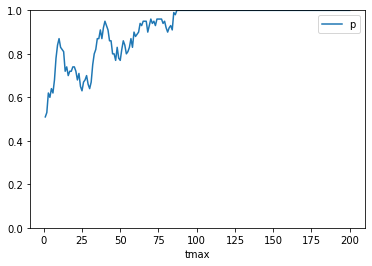

In [ ]:
#Plotting the results
# gca stands for 'get current axis'
ax = plt.gca()

output.plot(kind='line',x='tmax',y='p',ax=ax)
plt.ylim(0, 1)

Building the Model as one function

In [ ]:
def unbiased_selection(N, tmax):
  """Unbiased Transission model where N: is the population, tmax: number of generations. """
  def random_gen(size, p=None):
    """Generate n-length ndarray of gen"""
    if not p:
        # default probabilities
        p = (0.5, 0.5)
    traits = ("A", "B")
    return np.random.choice(traits, size=size, p=p)

  #Create first gen
  df = pd.DataFrame(random_gen(N))
  df.columns = ['traits']

  #create output
  data = [[1, df['traits'].value_counts()['A']/N]]
  output = pd.DataFrame(data, columns = ['tmax', 'p'])

  #Selection
  for t in range(2,tmax+1):
    p_df = df
    records = p_df.to_records(index=False)
    result = list(records)
    df = pd.DataFrame(np.random.choice(result, N, replace= True))
    exists = 'A' in df.traits.unique()
    if exists:
      s = df['traits'].value_counts()['A']
    else:
      s = 0
    o = {'tmax': t, 'p': s/N}
    output = output.append(o, ignore_index = True)
  
  #Plot
  ax = plt.gca()
  output.plot(kind='line',x='tmax',y='p',ax=ax)
  plt.ylim(0, 1)


In [ ]:
def unbiased_selection_2(N, tmax, r):
  """Unbiased Transmission model with multiple runs where N: is the population, tmax: number of generations and r: number of runs. """
  runs=[]
  for r in range(r):
    unbiased_selection(N,tmax)
    runs.append(r+1)
    plt.legend(runs)


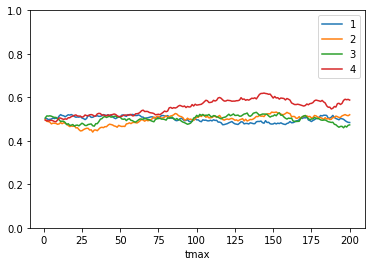

In [ ]:
unbiased_selection_2(10000,200,4)